# Roadmap

- State the question and determine required data
> - A system to predict his employees' payments in order to adjust their salary accordingly. He is asking you to find the best possible way to predict this and build a product for him
- Acquire the data in an accessible format
- Identify and correct missing data points/anomalies as required
- Prepare the data for the machine learning model
- Establish a baseline model that you aim to exceed
- Train the model on the training data
- Make predictions on the test data
- Compare predictions to the known test set targets and calculate performance metrics
- If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
- Interpret model and report results visually and numerically

In [275]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [276]:
#Datasets
PATH = "../Datasets/Originals/UCI_Credit_Card.csv"

In [277]:
df = pd.read_csv(PATH)

In [278]:
#This dataset contains information on default payments, demographic factors, credit data, history of payment, 
#and bill statements of credit card clients in Taiwan from April 2005 to September 2005

In [279]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


Content
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT (Nouveau Dollars = dollar taiwanais) dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

# Notes

- A billing statement is a monthly report that credit card companies issue to credit card holders showing their recent transactions, monthly minimum payment due, and other vital information. Billing statements are issued monthly at the end of each billing cycle.20

# Renaming for clarity

In [280]:
table = df.copy()

In [281]:
table.rename(columns={"PAY_0": "REPAYMENT_status_in_September", 
                      "PAY_2":"REPAYMENT_status_in_August",
                     "PAY_3": "REPAYMENT_status_in_July",
                     "PAY_4": "REPAYMENT_status_in_June",
                     "PAY_5": "REPAYMENT_status_in_May",
                     "PAY_6": "REPAYMENT_status_in_April",
                     "BILL_AMT1":"BILL_amount_in_September",
                     "BILL_AMT2":"BILL_amount_in_August",
                     "BILL_AMT3":"BILL_amount_in_July",
                     "BILL_AMT4":"BILL_amount_in_June",
                     "BILL_AMT5":"BILL_amount_in_May",
                     "BILL_AMT6":"BILL_amount_in_April",
                     "PAY_AMT1":"PAY_amount_in_September",
                     "PAY_AMT2":"PAY_amount_in_August",
                     "PAY_AMT3":"PAY_amount_in_July",
                     "PAY_AMT4":"PAY_amount_in_June",
                     "PAY_AMT5":"PAY_amount_in_May",
                     "PAY_AMT6":"PAY_amount_in_April",
                     "default.payment.next.month": "Default payment",
                     "LIMIT_BAL": "CreditAmount"}, inplace=True)#i am a simple man

# The columns

In [282]:
#Variables and features building...

In [283]:
cols = list(table.columns)

In [284]:
#cols

In [285]:
first3_months = ['ID','CreditAmount', 
                 'REPAYMENT_status_in_June',
                 'REPAYMENT_status_in_May',
                 'REPAYMENT_status_in_April', 'BILL_amount_in_June',
                 'BILL_amount_in_May',
                 'BILL_amount_in_April' 'PAY_amount_in_June',
                 'PAY_amount_in_May',
                 'PAY_amount_in_April',
                 ]

In [286]:
last2_months = ['ID',
                'CreditAmount', 
                'REPAYMENT_status_in_September',
                'REPAYMENT_status_in_August',
                'BILL_amount_in_September',
                'BILL_amount_in_August',
                'PAY_amount_in_September',
                'PAY_amount_in_August'
             ]

In [287]:
only_payment = ['ID',
                 'CreditAmount',
                 'REPAYMENT_status_in_September',
                 'REPAYMENT_status_in_August',
                 'REPAYMENT_status_in_July',
                 'REPAYMENT_status_in_June',
                 'REPAYMENT_status_in_May',
                 'REPAYMENT_status_in_April',
                 'BILL_amount_in_September',
                 'BILL_amount_in_August',
                 'BILL_amount_in_July',
                 'BILL_amount_in_June',
                 'BILL_amount_in_May',
                 'BILL_amount_in_April',
                 'PAY_amount_in_September',
                 'PAY_amount_in_August',
                 'PAY_amount_in_July',
                 'PAY_amount_in_June',
                 'PAY_amount_in_May',
                 'PAY_amount_in_April',
                 ]

--------------------------

In [288]:
#table.isna().sum()no mising values

In [289]:
table["Default payment"].value_counts()#No weird values

0    23364
1     6636
Name: Default payment, dtype: int64

In [290]:
table["SEX"].value_counts()#No weird value

2    18112
1    11888
Name: SEX, dtype: int64

In [291]:
table["EDUCATION"].value_counts() #- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [292]:
#4/6/0 are not clear/explained. Anyway they dont represent a large portion of the dataset

In [293]:
table.drop(table[table.EDUCATION==4].index,inplace=True)
table.drop(table[table.EDUCATION==5].index,inplace=True)
table.drop(table[table.EDUCATION==6].index,inplace=True)

# Remodeling EDUCATION

In [294]:
table["EDUCLVL_school"] = table["EDUCATION"].apply(lambda x: 1 if x==1 else 0)
table["EDUCLVL_university"] = table["EDUCATION"].apply(lambda x: 1 if x==2 else 0)
table["EDUCLVL_high_school"] = table["EDUCATION"].apply(lambda x: 1 if x==3 else 0)

In [295]:
#table.drop('EDUCATION',axis=1,inplace=True)

In [296]:
table.sample(5)

,ID,CreditAmount,SEX,EDUCATION,MARRIAGE,AGE,REPAYMENT_status_in_September,REPAYMENT_status_in_August,REPAYMENT_status_in_July,REPAYMENT_status_in_June,REPAYMENT_status_in_May,REPAYMENT_status_in_April,BILL_amount_in_September,BILL_amount_in_August,BILL_amount_in_July,BILL_amount_in_June,BILL_amount_in_May,BILL_amount_in_April,PAY_amount_in_September,PAY_amount_in_August,PAY_amount_in_July,PAY_amount_in_June,PAY_amount_in_May,PAY_amount_in_April,Default payment,EDUCLVL_school,EDUCLVL_university,EDUCLVL_high_school
6313,6314,360000.0,1,1,2,29,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
6475,6476,360000.0,1,2,1,49,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
23179,23180,190000.0,2,2,1,34,1,-2,-2,-2,-2,-2,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
22816,22817,260000.0,2,2,1,33,0,0,0,0,0,0,112501.0,110395.0,112288.0,113388.0,114128.0,117005.0,4000.0,5550.0,5600.0,4100.0,4700.0,11002.0,0,0,1,0
2078,2079,260000.0,1,1,2,34,-1,-1,-1,-1,-1,-1,6776.0,3198.0,2123.0,11774.0,6166.0,3583.0,3222.0,2125.0,11892.0,6192.0,3601.0,3403.0,0,1,0,0


---------------------------

In [297]:
table["MARRIAGE"].value_counts() #- MARRIAGE: Marital status (1=married, 2=single, 3=others)
#What is 0? What others means(3)?Divorced? seems low for divorce.

2    15748
1    13429
3      315
0       54
Name: MARRIAGE, dtype: int64

In [298]:
table.drop(table[table.MARRIAGE==3].index,inplace=True)
table.drop(table[table.MARRIAGE==0].index,inplace=True)

-------------------------------------

In [299]:
table["REPAYMENT_status_in_August"].value_counts()
#Repayment status in September, 2005 
#(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
#8=payment delay for eight months, 9=payment delay for nine months and above)

 0    15229
-1     5916
 2     3860
-2     3668
 3      324
 4       95
 1       27
 5       25
 7       20
 6       12
 8        1
Name: REPAYMENT_status_in_August, dtype: int64

In [300]:
# What is -2?  
#0 look to be paid in time


In [301]:
table[only_payment].head()

,ID,CreditAmount,REPAYMENT_status_in_September,REPAYMENT_status_in_August,REPAYMENT_status_in_July,REPAYMENT_status_in_June,REPAYMENT_status_in_May,REPAYMENT_status_in_April,BILL_amount_in_September,BILL_amount_in_August,BILL_amount_in_July,BILL_amount_in_June,BILL_amount_in_May,BILL_amount_in_April,PAY_amount_in_September,PAY_amount_in_August,PAY_amount_in_July,PAY_amount_in_June,PAY_amount_in_May,PAY_amount_in_April
0,1,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [302]:
table.head()

,ID,CreditAmount,SEX,EDUCATION,MARRIAGE,AGE,REPAYMENT_status_in_September,REPAYMENT_status_in_August,REPAYMENT_status_in_July,REPAYMENT_status_in_June,REPAYMENT_status_in_May,REPAYMENT_status_in_April,BILL_amount_in_September,BILL_amount_in_August,BILL_amount_in_July,BILL_amount_in_June,BILL_amount_in_May,BILL_amount_in_April,PAY_amount_in_September,PAY_amount_in_August,PAY_amount_in_July,PAY_amount_in_June,PAY_amount_in_May,PAY_amount_in_April,Default payment,EDUCLVL_school,EDUCLVL_university,EDUCLVL_high_school
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0


In [303]:
table.shape#almost 600 lines got removed.

(29177, 28)

# Vizualisation

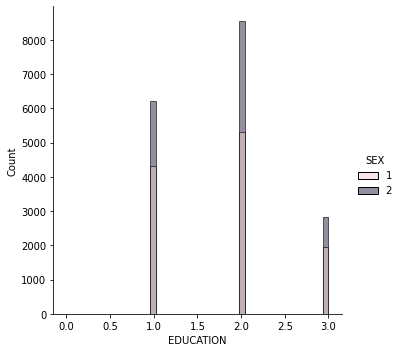

In [306]:
sns.displot(data=table,x="EDUCATION",hue="SEX")#Gender (1=male, 2=female)

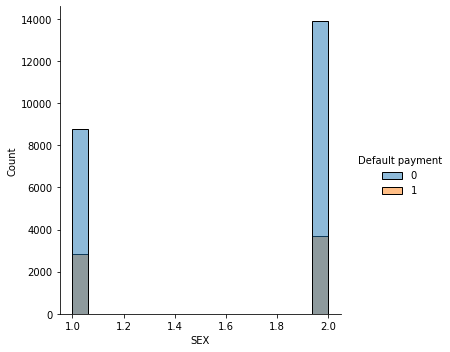

In [305]:
sns.displot(data=table,x="SEX",hue="Default payment")#Gender (1=male, 2=female)

In [308]:
final = table.drop(["EDUCATION","ID"],axis=1)

In [309]:
final

,CreditAmount,SEX,MARRIAGE,AGE,REPAYMENT_status_in_September,REPAYMENT_status_in_August,REPAYMENT_status_in_July,REPAYMENT_status_in_June,REPAYMENT_status_in_May,REPAYMENT_status_in_April,BILL_amount_in_September,BILL_amount_in_August,BILL_amount_in_July,BILL_amount_in_June,BILL_amount_in_May,BILL_amount_in_April,PAY_amount_in_September,PAY_amount_in_August,PAY_amount_in_July,PAY_amount_in_June,PAY_amount_in_May,PAY_amount_in_April,Default payment,EDUCLVL_school,EDUCLVL_university,EDUCLVL_high_school
0,20000.0,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0
1,120000.0,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0
2,90000.0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0
3,50000.0,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0
4,50000.0,1,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,1
29996,150000.0,1,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0,1
29997,30000.0,1,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0,1,0
29998,80000.0,1,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0,1


In [311]:
final.to_csv("../Datasets/Modified/mod_UCI_Credit_Card.csv",index=False)